In [2]:
import numpy as np
from numpy import inf
from scipy.constants import *
import matplotlib.pyplot as plt

from IDRIM.constants import *
from IDRIM.relations import *
from IDRIM.graph import *
from IDRIM.commons import *
from IDRIM.checks import *
from IDRIM.checks import *
from IDRIM.genesis import *
from IDRIM.ymodcom import *

In [3]:
print(Dt/1e-15)

0.060001200024096514


In [29]:
import IDRIM.sample as sam
from scipy.integrate import quad
from scipy.integrate import simpson

In [3]:
m01=  sam.CalculateMass(wp0, Ef)
print(m01/m_e)

0.2623384490557345


In [34]:
def localfunc(E):
    return (((2)/(3*(2*eta*E+1)))+(1)/(3*(2*eta*E+1)**3))
def integrand(E, mu, T):
    return ((E+eta*E**2)**0.5)*(1+2*eta*E)*FermiDirac(E, mu, T)*localfunc(E)
C = quad(integrand, 0, 100*e, args=(0.96*e, 300))[0]
m02 = ((4*pi**4*epsilon_0**2*wp0**4*hbar**6)/(8*e**4*C**2))
print(m02/m_e)
print(C)

0.18318372607308753
4.4325346489518723e-29


In [18]:
print(C)

4.432534648951872e-29


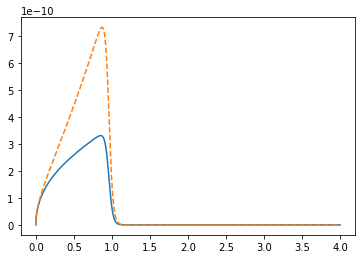

In [5]:
plt.plot(energy_array/e, integrand(energy_array, 0.96*e, 300))
plt.plot(energy_array/e, sam.IntegrandC2(energy_array, 0.96*e, 300), linestyle="dashed")

In [6]:
0.2623384490557345/0.18318372607308753

1.4321056497729796

In [13]:
C2 = sam.IntegrateC2(Ef, 300)
C1 = sam.IntegrateC1a(Ef, 300)
print((C1*C2)**2)
print(C**2)

2.6250157662461282e-15
1.9647363414158892e-57


In [8]:
print(C1)
print((C1/C2)*C2)

6.366122997412059e+20
6.366122997412059e+20


In [9]:
quad(sam.IntegrandC1a, 0, 5*e, args=(0.96*e, 300))[0]

6.366122997412063e+20

In [10]:
quad(sam.IntegrandC1a, 0, 100*e, args=(0.96*e, 300))[0]

6.366122997412059e+20

In [3]:
dummy={}#need dummy dictionary to generate arrays
mu_array, Cp_array, Ce_array, wp_array, X, X = Regeneration(dummy, OVERRIDE=-1)
del X
#^^^regeneration would generate RI array, don't want that as it needs specific wavelength
#use override = -1 to block it generating.
#Need plasma freq array, will generate RI for each wavelength separately.

OVERRIDE Detected. Regenerating.
Solving Chemical Potential. This may take some time.
Mu Generated and Saved.
Generating Phonon Heat Capacity.
Phonon Heat Capacity generated and saved.
Generating Electron Heat Capacity.
Electron Heat Capacity generated and saved.
Generating Plasma Frequency
Plasma Frequency array generated and saved.


REGENERATION COMPLETE.


In [3]:
ENZ = 1/(2*pi)*np.sqrt((wp_array**2)/(eps_inf) -gamma0**2 )

Text(0, 0.5, 'ENZ Frequency (THz)')

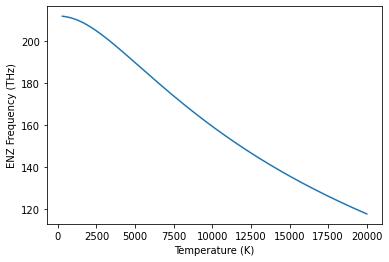

In [4]:
plt.plot(temperature_array, ENZ/1e12)
plt.xlabel("Temperature (K)")
plt.ylabel("ENZ Frequency (THz)")

In [5]:
EffMassConventional(1*e)/m_e

1.6036521365418814

In [6]:
me_min*(2*eta*1*e +1)**3/m_e

1.6036521365418814

In [7]:
print(Tf)

11604.518121550082


In [8]:
print("Constant Plasma Frequency:", wp0)
print("Calculated Plasma Frequency:", wp_array[0])

Constant Plasma Frequency: 2600000000000000.0
Calculated Plasma Frequency: 2597656102480919.5


[1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.] nm
New Gamma: 284784248723237.06
New Plasma: 2530059137352779.5


Text(0, 0.5, 'Transmission')

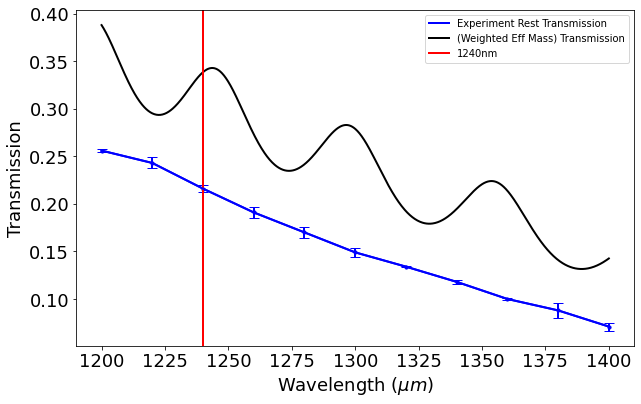

In [10]:
#experiment data import
Tom_wavel = np.linspace(1200,1400,11)*nm
Tom_freq = (c*2*pi)/(Tom_wavel)
print(Tom_wavel/nm,"nm")
#could import through np.genfromtxt but not that many values (11)
Tom_transmission = [0.256, 0.243, 0.216, 0.191, 0.170, 0.149, 0.134, 0.118, 0.100, 0.088, 0.071]
Tom_error = [0.001741204, 0.005811122, 0.003558401, 0.005952769, 0.005736563, 0.004808485, 0.000878229, 0.002320046, 0.001483688,0.00804473,0.004164257]
#error is calculated from standard deviations (sample, not pop)
#print(Tom_transmission)
plt.scatter(Tom_wavel/nm, Tom_transmission, color="blue", s=10)
plt.plot(Tom_wavel/nm, Tom_transmission, color="blue", label="Experiment Rest Transmission")
plt.errorbar(Tom_wavel/nm, Tom_transmission, yerr=Tom_error, color="blue", capsize=5)

Wavel_array = np.linspace(1200*nm, 1400*nm, DIM)
Freq_array = (c*2*pi)/(Wavel_array)
ENZ = 212*1e12#from justus

#Weighted effective mass
#TEST_PLASMA = 2.6e15#trial plasma
TEST_PLASMA = wp_array[0] #generated
gamma_1 = np.sqrt((TEST_PLASMA**2)/(eps_inf) - (2*pi*ENZ)**2)
print("New Gamma:", gamma_1)
print("New Plasma:", TEST_PLASMA)
Perm_model = Permittivity(Freq_array, TEST_PLASMA, gamma_1)
n_ito = np.sqrt(Perm_model)
n_sub = 1.5#hardcoded this way in f:TMM_Run but option if you need it
d_ito = 407*nm #thickness of ITO sample
d_sub = 10000*nm #thickness of substrate
RM, TM, AM = MatrixMethod(n_ito, n_sub, Wavel_array, d_ito, d_sub, DIM)
plt.plot(Wavel_array/nm, TM, color="black", label="(Weighted Eff Mass) Transmission")
#plt.errorbar(Tom_wavel/nm, TM, yerr=0.09002757461495986, color="black", capsize=5)
for i in range(11):
    CheckART(RM[i], TM[i], AM[i])

#Optical Effective Mass
#AvgEffMass_optical = GenAvgEffMass(mu_array, DEX=1)
#wp_opt_array = GenPlasmaFrequency(AvgEffMass_optical, Skip=0)
#gamma_opt = np.sqrt((wp_opt_array[0]**2)/(eps_inf) - (2*pi*ENZ)**2)
#Perm_opt_array = Permittivity(Tom_freq, wp_opt_array[0], gamma_opt)
#RI_opt_array = np.sqrt(Perm_opt_array)
#RO, TO, AO = MatrixMethod(RI_opt_array, n_sub, Tom_wavel, d_ito, d_sub, 11)
#plt.plot(Tom_wavel/nm, TO, color="red", label="(Optical Eff Mass) Transmission")
#plt.errorbar(Tom_wavel/nm, TO, yerr=0.09002757461495986, color="red", capsize=5)
#print("Optical Plasma:", wp_opt_array[0])
#for i in range(11):
    #CheckART(RO[i], TO[i], AO[i])

#Conventional Effective Mass
#AvgEffMass_con = GenAvgEffMass(mu_array, DEX=2)
#wp_con_array = GenPlasmaFrequency(AvgEffMass_con, Skip=0)
#gamma_con = np.sqrt((wp_con_array[0]**2)/(eps_inf) - (2*pi*ENZ)**2)
#Perm_con_array = Permittivity(Tom_freq, wp_con_array[0], gamma0)
#RI_con_array = np.sqrt(Perm_con_array)
#RC, TC, AC = MatrixMethod(RI_con_array, n_sub, Tom_wavel, d_ito, d_sub, 11)
#plt.plot(Tom_wavel/nm, TC, color="green", label="(Conventional Eff Mass) Transmission")
#plt.errorbar(Tom_wavel/nm, TC, yerr=0.09002757461495986, color="green", capsize=5)

#for i in range(DIM):
    #CheckART(RC[i], TC[i], AC[i])

#POLY = np.polyfit(Wavel_array, TM, 6)
#x = Wavel_array
#y = POLY[0]*x**6 + POLY[1]*x**5 + POLY[2]*x**4 + POLY[3]*x**3 + POLY[4]*x**2+POLY[5]*x**1 + POLY[6]

#plt.plot(Wavel_array/nm, y, color="red", label="Average Line")
plt.axvline(1240, color="red", label="1240nm")
plt.legend()


plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")

In [5]:
#M_GraphStaple()
textsize = 18
font = {'family': 'DejaVu Sans', 'weight': 'normal','size': textsize,}
plt.rc('font', family='DejaVu Sans', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=textsize)
plt.rc('ytick', labelsize=textsize)
plt.rc('axes', labelsize=textsize)
plt.rc('lines', linewidth=2)
width = 10
height = width / 1.618
plt.rcParams["figure.figsize"] = (width, height)

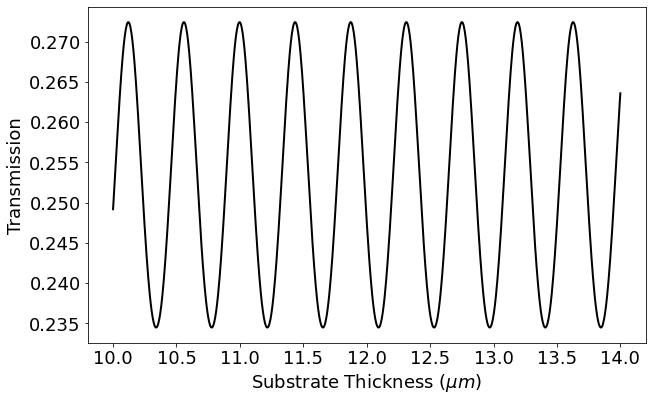

In [39]:
Wavelength = 1240*nm
Thick_array = np.linspace(10000, 14000, DIM)
R = np.zeros(DIM)
T = np.zeros(DIM)
A = np.zeros(DIM)

n = np.sqrt(Permittivity(WavelengthToFrequency(Wavelength), wp_array[0], gamma0))
#print(wp0, wp_array[0])
#print(n)
#print(Wavelength)
Thick0 = [inf, 407, 1000, inf]
R0, T0, A0 = TMM_Run(n, Wavelength, Thick0, 30)
#print(T0)
for i in range(DIM):
    Thicks = [inf, 407, Thick_array[i], inf]
    R[i], T[i], A[i] = TMM_Run(n, Wavelength, Thicks, 30)

plt.plot(Thick_array/1e3, T, color="black", label="Model")
#POLY = np.polyfit(Thick_array, T, 6)
#x = Thick_array
#y = POLY[0]*x**6 + POLY[1]*x**5 + POLY[2]*x**4 + POLY[3]*x**3 + POLY[4]*x**2+POLY[5]*x**1 + POLY[6]
x = Thick_array
Z = 0.4482 + 0.04501*np.cos(0.01569225530468096*x)
#plt.plot(Thick_array, Z)
Z2 = 0.20 + 0.04501*np.cos(0.01569225530468096*x-0.12)
#plt.plot(Thick_array, Z2, label="Periodic Approx")
#plt.plot(Thick_array, y, color="red", label="Average Line")
plt.xlabel("Substrate Thickness ($\mu m$)")
plt.ylabel("Transmission")
#plt.legend()
plt.savefig('substrate_thickness.png', dpi=200)

In [13]:
max(T)-min(T)

0.03794514600010715

In [11]:
j = 0
print(Thick_array[j])
print(T[j])

10000.0
0.1460045389058475


In [12]:
print("Max Transmission", max(T))
print("Min Transmission", min(T))
print("Delta:", max(T) - min(T))

Max Transmission 0.1630692455537373
Min Transmission 0.13887137496034757
Delta: 0.024197870593389736


2600000000000000.0 2597656102480919.5
(0.7586004780058615+0.7124176313973212j)
1.4000000000000001e-06
0.11318754986119474


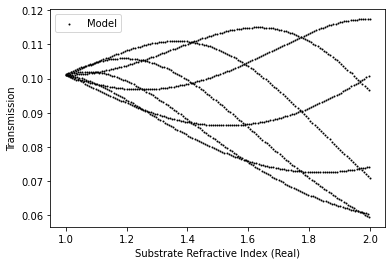

In [13]:
DIM = 1000

Wavelength = 1400*nm
Thick_array = np.linspace(10000, 12000, DIM)
R3 = np.zeros(DIM)
T3 = np.zeros(DIM)
A3 = np.zeros(DIM)

n = np.sqrt(Permittivity(WavelengthToFrequency(Wavelength), wp_array[0]))
print(wp0, wp_array[0])
print(n)
print(Wavelength)
Thick0 = [inf, 407, 1000, inf]
R0, T0, A0 = TMM_Run(n, Wavelength, Thick0, 0)
print(T0)

subRI = np.linspace(1, 2, DIM)
for i in range(DIM):
    Thicks = [inf, 407, 200000, inf]
    R3[i], T3[i], A3[i] = TMM_Run(n, Wavelength, Thicks, 0, n_sub = subRI[i])

plt.scatter(subRI, T3, s=1, color="black", label="Model")
#POLY = np.polyfit(Thick_array, T, 6)
#x = Thick_array
#y = POLY[0]*x**6 + POLY[1]*x**5 + POLY[2]*x**4 + POLY[3]*x**3 + POLY[4]*x**2+POLY[5]*x**1 + POLY[6]
#x = Thick_array
#Z = 0.4482 + 0.04501*np.cos(0.01569225530468096*x)
#plt.plot(Thick_array, Z)
#Z2 = 0.20 + 0.04501*np.cos(0.01569225530468096*x-0.12)
#plt.plot(Thick_array, Z2, label="Periodic Approx")
#plt.plot(Thick_array, y, color="red", label="Average Line")
plt.xlabel("Substrate Refractive Index (Real)")
plt.ylabel("Transmission")
plt.legend()
#plt.axhline(0.16)
#plt.axhline(0.243)

# changing permittivity

In [26]:
pdim = 100
ENZ = 212*1e12
plasma = np.linspace(2.5, 5, pdim)*1e15
Wavel_array = np.linspace(1200*nm, 1400*nm, DIM)
Freq_array = WavelengthToFrequency(Wavel_array)
epsilon_r = np.zeros((DIM, pdim))
epsilon_i = epsilon_r
n_r = epsilon_r
n_i = n_r
a_T = np.zeros(pdim)
print(plasma[0])
print(np.sqrt((plasma[0]**2)/(eps_inf) - (2*pi*ENZ)**2))
print(wp0/11.5)
WAVELENGTH = 1240*nm
masterT = np.zeros(shape=(DIM, pdim))

for j in range(DIM):
    for i in range(pdim):
        w = WavelengthToFrequency(Wavel_array[j])
        wp = plasma[i]
        gamma = np.sqrt((wp**2)/(eps_inf) - (2*pi*ENZ)**2)
            
        #epsilon_r[j][i] = eps_inf - ((wp**2)/(w**2 + gamma**2))
        #epsilon_i[j][i] = (wp**2 * gamma)/(w**3 + gamma**2 * w)
        d_eps = Permittivity(w, wp, gamma)
        d_n = np.sqrt(d_eps)
        #n_r[j][i] = d_n.real
        #n_i[j][i] = d_n.imag
        #print(d_n)
            
        R, T, A = TMM_Run(d_n, Wavel_array[j], [inf, 407, 200000, inf], 30)
        CheckART(R, T, A)
        a_T[i] = T
    masterT[j] = a_T

2500000000000000.0
193070458870098.4
226086956521739.12


In [36]:
print(Wavel_array[200]/nm)

1240.0400400400401


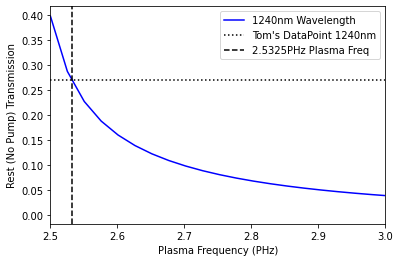

In [44]:
plt.plot(plasma/1e15, masterT[200], label="1240nm Wavelength", color="blue")
#plt.plot(plasma/1e15, masterT[999], label="1400nm Wavelength", color="red")
#plt.plot(plasma/1e15, masterT[100], label="1220nm Wavelength", color="green")
#plt.plot(plasma/1e15, masterT[800], label="1360nm Wavelength", color="orange")
plt.axhline(0.27, color="black", linestyle="dotted", label="Tom's DataPoint 1240nm")

plt.xlabel("Plasma Frequency (PHz)")
plt.ylabel("Rest (No Pump) Transmission")
plt.xlim(2.5, 3)
#plt.axvline(2.5, color="black", linestyle="dashed", label="Minimum Plasma Frequency")

#plt.axvline(2.593, color="black", linestyle="dashed", label="2.593PHz Plasma Frequency")#

plt.axvline(2.5325, color="black", linestyle="dashed", label="2.5325PHz Plasma Freq")
plt.legend()

In [57]:
#print(plasma[1])
#print(plasma[2])
print((plasma[2]+plasma[1])/2)

2537878787878788.0


In [16]:
import IDRIM.errors as err
Delta, subs = err.GlobalSubstrateError(1240*nm, wp_array[0], 0)
Wavelength=1240*nm
RA = np.zeros(DIM)
TA = np.zeros(DIM)
AA = np.zeros(DIM)
RA2 = np.zeros(DIM)
TA2 = np.zeros(DIM)
AA2 = np.zeros(DIM)
RA3 = np.zeros(DIM)
TA3 = np.zeros(DIM)
AA3 = np.zeros(DIM)

Thick = [inf, 407, 10000, inf]
Thick2 = [inf, 407, subs[0], inf]
Thick3 = [inf, 407, subs[1], inf]
angle = np.linspace(0, 90, DIM)
n = np.sqrt(Permittivity(WavelengthToFrequency(Wavelength), wp_array[0]))
for i in range(DIM):
    RA[i], TA[i], AA[i] = TMM_Run(n, Wavelength, Thick, angle[i])
    RA2[i], TA2[i], AA2[i] = TMM_Run(n, Wavelength, Thick2, angle[i])
    RA3[i], TA3[i], AA3[i] = TMM_Run(n, Wavelength, Thick3, angle[i])

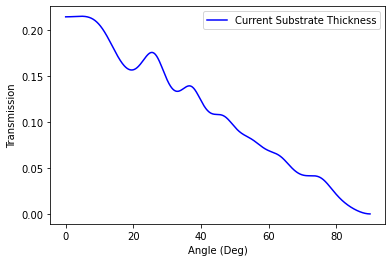

In [17]:
plt.plot(angle, TA, color="blue", label="Current Substrate Thickness")
#plt.plot(angle, TA2, color="red", linestyle="dashed", label="Max Substrate")
#plt.plot(angle, TA3, color="red", linestyle="dashed", label="Min Substrate")
plt.xlabel("Angle (Deg)")
plt.ylabel("Transmission")
plt.legend()

In [18]:
WavelengthToFrequency(1414*nm)/(1e12*2*pi)

212.01729702970297

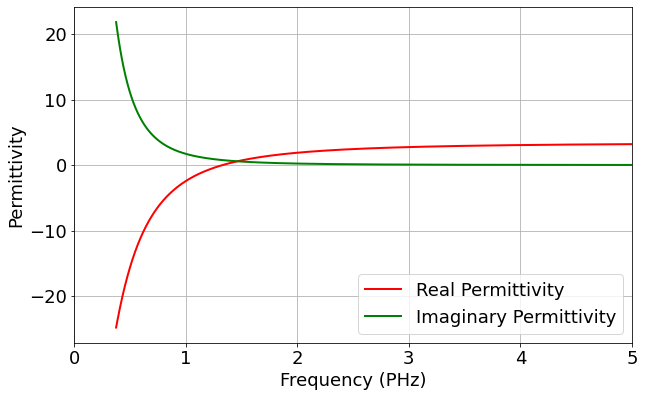

In [26]:
Wavel_array = np.linspace(100*nm, 5000*nm, DIM)
Freq_array = WavelengthToFrequency(Wavel_array)
gamma1 = gamma0
Eps = Permittivity(Freq_array, wp_array[0], gamma0)
Eps2 = Permittivity(Freq_array, wp_array[0], gamma0*5)

n = np.sqrt(Eps)
n2 = np.sqrt(Eps2)
plt.plot(Freq_array/1e15, Eps.real, label="Real Permittivity", color="red")
plt.plot(Freq_array/1e15, Eps.imag, label="Imaginary Permittivity", color="green")
#plt.plot(Freq_array/1e15, Eps2.real, label="Increased Scattering Rate", color="blue")
#plt.plot(Freq_array/1e15, Eps2.imag, label="Imaginary R.I.($Pe5* \gamma$)", color="purple")

plt.xlabel("Frequency (PHz)")
plt.ylabel("Permittivity")
plt.xlim(0, 5)
plt.legend(loc=4, prop={'size':18})
plt.grid()
plt.savefig('scat_rate_perm.png', dpi=200)

# colour map plot tests

In [20]:
Wavel_array = np.linspace(1200*nm, 1600*nm, DIM)
Freq_array = (c*2*pi)/(Wavel_array)

DIM2 = 1000
PERM_r = np.zeros(shape=(DIM, DIM2))
PERM_i = np.zeros(shape=(DIM, DIM2))

REFRACTIVE_r = np.zeros(shape=(DIM, DIM2))
REFRACTIVE_i = np.zeros(shape=(DIM, DIM2))

for i in range(DIM):
    for j in range(DIM2):
        PERM_r[i][j] = Permittivity(Freq_array[i], wp_array[j]).real
        PERM_i[i][j] = Permittivity(Freq_array[i], wp_array[j]).imag
        PERM = PERM_r[i][j]+1j*PERM_i[i][j]
        REFRACTIVE_r[i][j] = np.sqrt(PERM).real
        REFRACTIVE_i[i][j] = np.sqrt(PERM).imag

Text(0.5, 1.0, 'Real Refractive Index')

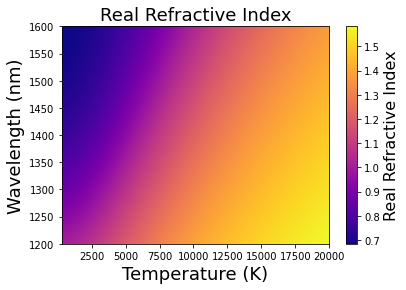

In [21]:
plt.pcolormesh(temperature_array, Wavel_array/1e-9, REFRACTIVE_r,cmap='plasma', shading='auto')
#plt.plot(temperature_array, Freq_array/1e15)
plt.colorbar(label="Real Refractive Index").set_label(label="Real Refractive Index", size=16)
plt.xlabel("Temperature (K)",fontsize=18)
plt.ylabel("Wavelength (nm)",fontsize=18)
plt.title("Real Refractive Index",fontsize=18)
#plt.axhline(1417, color="black", linestyle="dashed", label="ENZ Wavelength", linewidth=3)
#plt.legend(loc=2,prop={'size':16})
#plt.savefig('real_ri_colour.jpg', dpi=2000)

Text(0.5, 1.0, 'Imaginary Refractive Index')

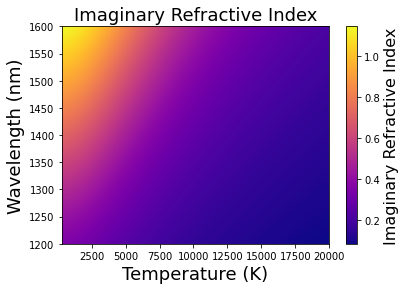

In [22]:
plt.pcolormesh(temperature_array, Wavel_array/1e-9, REFRACTIVE_i,cmap='plasma', shading='auto')
plt.colorbar(label="Imaginary Refractive Index").set_label(label="Imaginary Refractive Index", size=16)
plt.xlabel("Temperature (K)",fontsize=18)
plt.ylabel("Wavelength (nm)",fontsize=18)
plt.title("Imaginary Refractive Index", fontsize=18)
#plt.axhline(1417, color="black", linestyle="dashed", label="ENZ Wavelength", linewidth=3)
#plt.legend(loc=2, prop={'size':16})
#plt.savefig('imag_ri_colour.jpg', dpi=2000)

In [23]:
AvgEffMassITO = GenAvgEffMass(mu_array, DEX=0)
AvgEffMassCON = GenAvgEffMass(mu_array, DEX=2)

Text(0.5, 1.0, 'Effective Mass Change with Temperature')

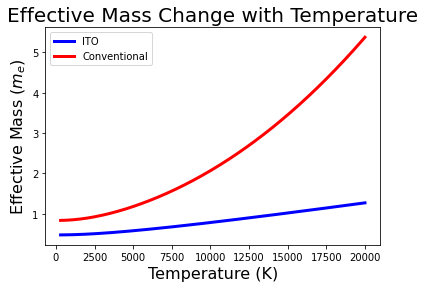

In [24]:
plt.plot(temperature_array, AvgEffMassITO/m_e, label="ITO", color="b", linewidth=3)#
plt.plot(temperature_array, AvgEffMassCON/m_e, label="Conventional", color="red", linewidth=3)
plt.xlabel("Temperature (K)",fontsize=16)
plt.ylabel("Effective Mass ($m_e$)",fontsize=16)
#plt.xlim(0, 10000)
plt.legend(loc=2, prop={'size':10})
plt.title("Effective Mass Change with Temperature",fontsize=20)
#plt.savefig('eff_mass_3.svg')

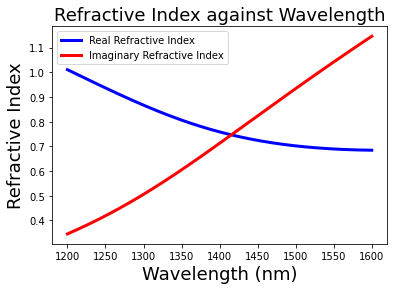

In [25]:
PERM_redu_r = np.zeros(DIM)
PERM_redu_i = np.zeros(DIM)
for i in range(DIM):
    PERM_redu_r[i] = PERM_r[i][0]
    PERM_redu_i[i] = PERM_i[i][0]

n = np.sqrt(PERM_redu_r + 1j*PERM_redu_i)
    
plt.plot(Wavel_array/nm, n.real, label="Real Refractive Index", color="blue", linewidth=3)
plt.plot(Wavel_array/nm, n.imag, label="Imaginary Refractive Index", color="red",linewidth=3)
plt.xlabel("Wavelength (nm)", fontsize=18)
plt.ylabel("Refractive Index", fontsize=18)
plt.title("Refractive Index against Wavelength", fontsize=18)
plt.legend(loc=2, prop={'size':10})
#plt.savefig('RI_lambda.svg')

In [61]:
ENZ = 212*1e12
TEST_PLASMA= 2.5325*1e15
gamma_1 = np.sqrt((TEST_PLASMA**2)/(eps_inf) - (2*pi*ENZ)**2)
print(gamma_1/1e12)

291.0048294856333


In [62]:
import IDRIM.sample as sam

Minimum Effective Mass: 0.2581855200821601 m_e
Number Density at 0 Kelvin: 1.0071911873153335e+27
Chemical Potential at 300K: [0.99878644] eV


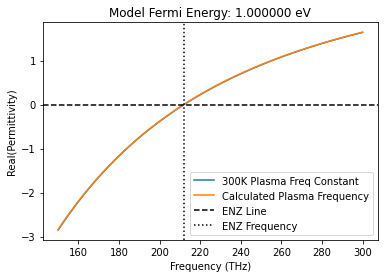

In [63]:
sam.Solver(wp0)

In [34]:
eps0 = Permittivity(WavelengthToFrequency(1240*nm), wp_array[0], gamma0)
n0 = np.sqrt(eps0)
print(eps0)

(0.7742113066052569+0.5125850283999184j)


In [33]:
TMM_Run(n0, 1240*nm, [inf, 407, 12750, inf], 30)

(0.023764286281226794, 0.27242079840417693, 0.7038149153145963)

In [35]:
def OmegaSolver(new_gamma, real_perm, freq):
    return (eps_inf-real_perm)*(freq**2+new_gamma**2)

In [38]:
np.sqrt(OmegaSolver(5*gamma0, 0.7742113066052569, WavelengthToFrequency(1240*nm)))/1e15

3.4408316341824885